In [1]:
#Import important python libraries
import pandas as pd
import numpy as np
from scipy import stats
import os

#For visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# **Metric Comparison**

In [2]:
#load data set and explore head
benin = pd.read_csv('C:/Users/nuhamin/Documents/kifiya/week 0/Cross-Country-Solar-Farm-Analysis/data/Benin_clean.csv')
sierraleone = pd.read_csv('C:/Users/nuhamin/Documents/kifiya/week 0/Cross-Country-Solar-Farm-Analysis/data/Sierraleone_clean.csv')
togo = pd.read_csv('C:/Users/nuhamin/Documents/kifiya/week 0/Cross-Country-Solar-Farm-Analysis/data/Togo_clean.csv')

print ('Clean Benin Data')
print(benin.shape)
print (benin.head())
print()

print ('Clean Sierraleone Data')
print(sierraleone.shape)
print (sierraleone.head())
print()

print ('Clean Togo Data')
print(togo.shape)
print (togo.head())
print()

Clean Benin Data
(517860, 18)
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3  

Clean Sierraleone Data
(509308, 18)
          Timestamp  GHI  DNI  DHI  ModA  Mo

In [3]:
#concatnate country dataframe into one
benin['Country'] = 'Benin'
sierraleone['Country'] = 'Sierraleone'
togo['Country'] = 'Togo'

#create new df by concatnation and pivot
combined_df = pd.concat([benin, sierraleone, togo], ignore_index=True)
combined_df_pivoted = combined_df.pivot_table(index='Timestamp', columns='Country')

#remove rows with any NaN values
countries_clean = combined_df_pivoted.dropna(axis=0) #df to easily plot box plot
countries_df = countries_clean.copy()

#swap the levels in the column index
countries_df.columns = countries_df.columns.swaplevel(0, 1)

#sort the columns by the first level (Country)
countries_df = countries_df.sort_index(axis=1, level=0)

#print head
print(countries_df.head())

#dataframe shape before and after dropping
print("dataframe shape before dropping rows is", combined_df_pivoted.shape)
print("dataframe shape after dropping rows:", countries_df.shape)

Country           Benin                                                        \
                     BP Cleaning  DHI  DNI  GHI ModA ModB Precipitation    RH   
Timestamp                                                                       
2021-10-30 00:01  994.0      0.0 -2.1 -0.5 -2.0  0.0  0.0           0.0  77.4   
2021-10-30 00:02  994.0      0.0 -2.1 -0.5 -2.0  0.0  0.0           0.0  77.6   
2021-10-30 00:03  994.0      0.0 -2.1 -0.5 -1.9  0.0  0.0           0.0  77.8   
2021-10-30 00:04  994.0      0.0 -2.1 -0.5 -2.0  0.0  0.0           0.0  77.9   
2021-10-30 00:05  994.0      0.0 -2.1 -0.5 -2.0  0.0  0.0           0.0  78.0   

Country                 ...          Togo                                 \
                 TModA  ... Precipitation    RH TModA TModB  Tamb     WD   
Timestamp               ...                                                
2021-10-30 00:01  23.5  ...           0.0  78.5  23.6  23.1  25.3  246.5   
2021-10-30 00:02  23.4  ...           0.0  78.3

In [4]:
#export cleaned dataframe to data/country
#define the directory and filename for the cleaned data
output_dir = 'C:/Users/nuhamin/Documents/kifiya/week 0/Cross-Country-Solar-Farm-Analysis/data'
output_filename = 'All_Countries_df.csv'
output_path = os.path.join(output_dir, output_filename)

#export the cleaned dataframe to csv file
countries_df.to_csv(output_path)

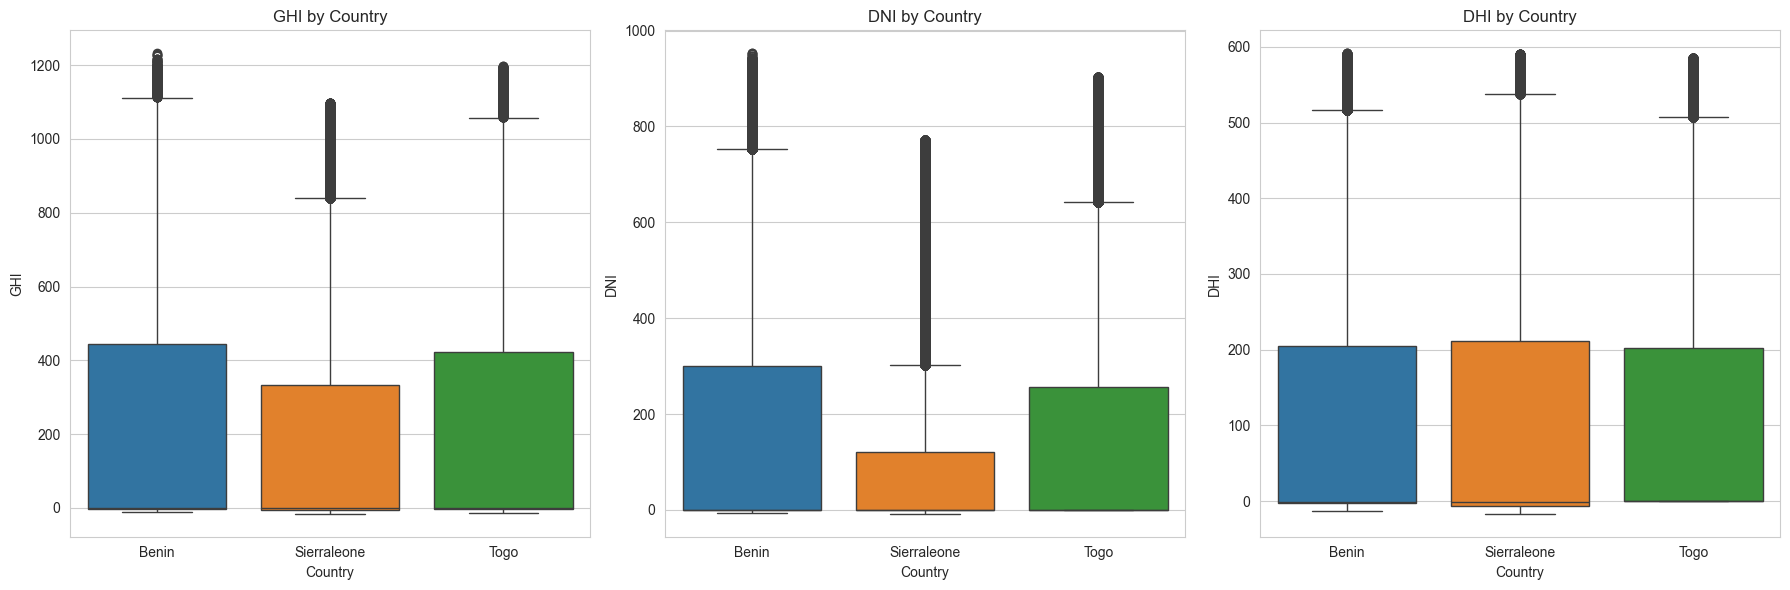

In [5]:
#box plot GHI, BHI, and DHI
sns.set_style("whitegrid")

#create a figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=False) #sharey=False allows different y-axis scales

#plot GHI boxplots
GHI_data = countries_clean['GHI']
sns.boxplot(data=GHI_data, ax=axes[0])
axes[0].set_title('GHI by Country')
axes[0].set_ylabel('GHI')
axes[0].set_xlabel('Country')

#plot DNI boxplots
DNI_data = countries_clean['DNI']
sns.boxplot(data=DNI_data, ax=axes[1])
axes[1].set_title('DNI by Country')
axes[1].set_ylabel('DNI')
axes[1].set_xlabel('Country')


#plot DHI boxplots
DHI_data = countries_clean['DHI']
sns.boxplot(data=DHI_data, ax=axes[2])
axes[2].set_title('DHI by Country')
axes[2].set_ylabel('DHI')
axes[2].set_xlabel('Country')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()
# Show the plots
plt.show()


In [6]:
#create summary table
metrics_to_summarize = ['GHI', 'DNI', 'DHI']
selected_metrics_df = countries_clean[metrics_to_summarize]
print (selected_metrics_df.agg([np.mean, np.median, np.std]))


                GHI                                 DNI              \
Country       Benin Sierraleone        Togo       Benin Sierraleone   
mean     224.889461  185.233857  219.303015  160.921755  112.120447   
median    -0.800000   -0.500000   -0.500000   -0.200000   -0.100000   
std      320.677333  281.843397  315.032836  254.290894  205.172217   

                            DHI                          
Country        Togo       Benin Sierraleone        Togo  
mean     150.793638  107.173300  103.120830  108.515466  
median     0.000000   -0.800000   -0.700000    0.300000  
std      246.674563  151.590489  148.600953  148.839504  


# **Statistical Testing**

In [7]:
#run a one-way ANOVA on GHI values to assess whether differences between countries are significant
#note p-value

#extract GHI values from countries df
benin_GHI= countries_df['Benin']['GHI']
sierraleone_GHI= countries_df['Sierraleone']['GHI']
togo_GHI= countries_df['Togo']['GHI']


#check if there is enough data for the test
if len(benin_GHI) > 1 and len(sierraleone_GHI) > 1 and len(togo_GHI) > 1:
        print('One-Way ANOVA on GHI')
        print()
        fvalue_anova, pvalue_anova = stats.f_oneway(benin_GHI, sierraleone_GHI, togo_GHI)
        print(f'ANOVA F-statistic is {fvalue_anova:.4f}') #rounded to four decimal point
        print(f'ANOVA p-value is {pvalue_anova:.4f}') #rounded to four decimal point

        #interpretation
        alpha = 0.05 #significance alpha level
        if pvalue_anova < alpha:
            print('The differences in mean GHI between the countries are statistically significant (p < 0.05).')
        else:
            print('The differences in mean GHI between the countries are not statistically significant (p >= 0.05).')
else:
     print("\nNot enough data points in one or more countries to perform One-Way ANOVA.")



One-Way ANOVA on GHI

ANOVA F-statistic is 1889.9980
ANOVA p-value is 0.0000
The differences in mean GHI between the countries are statistically significant (p < 0.05).


# **Key Observations**

## *GHI, DNI, and DHI Distribution*

The boxplots visually show the distribution of GHI, DNI, and DHI values for each country. They show that Benin has the highest mean value for two of the three irradiance variables, GHI and DNI, and it slightly gets edged out by Togo for DHI variable. Sierra Leone comes third in every irradiance variable. The country that have greatest variablity or large standard deviation is Benin.


## *Missing Data Impact*

The difference in DataFrame shape before and after dropping rows with NaN values is ignificant. The difference in shape indicates the extent of missing data and how many timestamps were common across all countries and all metrics.

## *Statistical Significance*

The p-values from the ANOVA tests provide statistical evidence about whether the observed differences in GHI values between the countries are likely due to random chance or represent a real difference. The result shows that the difference is statistically significant.

# **Visual Summary**

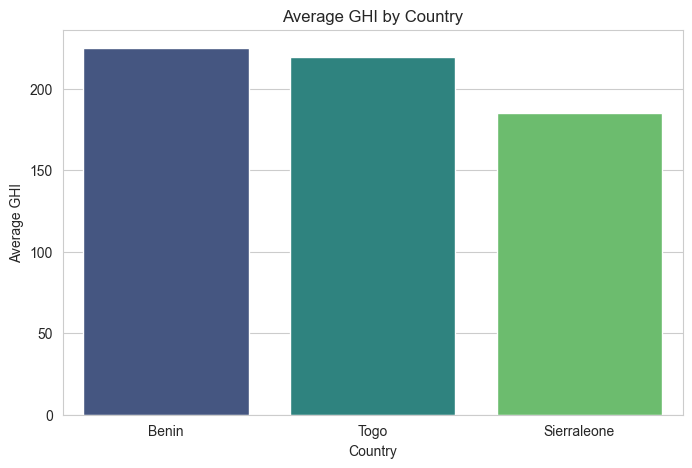

In [8]:
#create a bar chart ranking countries by average GHI
avg_ghi_by_country = countries_clean['GHI'].mean().sort_values(ascending=False)

#adjust figure size
plt.figure(figsize=(8, 5))

#create barplot
sns.barplot(x=avg_ghi_by_country.index, y=avg_ghi_by_country.values, palette='viridis') # Added palette
plt.title('Average GHI by Country')
plt.ylabel('Average GHI')
plt.xlabel('Country')

#show plot
plt.show()